# Progetto 2 - Antonio Furioso

C'è una correlazione tra le vittime uccise dalla polizia e il problema di razzismo negli USA?

In questa analisi che faremo andremo a vedere se esiste una correlazione, prendendo in considerazione alcuni dataset come quello creato dal Washington Post, da Gennaio 2015. Questo database è nato dopo l'omicidio di Micheal Brown a Ferguson che ha dato origine al movimento Black Lives Matters. Il database principale, compilato dal Post, segna tutte le vittimite da armi da fuoco da parte della polizia americana.

In [2]:
#importo tutte le librerie che mi serviranno per visualizzare e manipolare i dati 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Ecco qui il dataset principale:

In [3]:
kill = pd.read_csv('fatal-police-shootings-data.csv', parse_dates=True, index_col= 'date') #importo il file csv che mi serve per il progetto
kill.head()#visualizzo le prime 5 righe del file

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
date,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


Vediamo quante sono state le vittimine per ogni razza

Text(0.5, 0, 'kills')

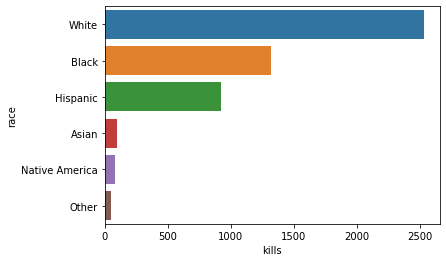

In [4]:
#rinomino i dati della colonna race per chiarezza
kill['race'] = kill['race'].replace(['B','A', 'W', 'O', 'H', 'N'], ['Black', 'Asian', 'White', 'Other', 'Hispanic', 'Native America'])
sns.countplot(y = 'race', data= kill, order = kill['race'].value_counts().index) #conto il numero di vittime in base alla razza
plt.xlabel('kills')

Da questo grafico, osservando il numero di vittime per razza, non si vede una forte discriminazione verso la razza nera, in quanto la razza bianca è stata quella più colpita.

Ora confrontiamo tra le varie razze quanti uomini e donne sono stati uccisi.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

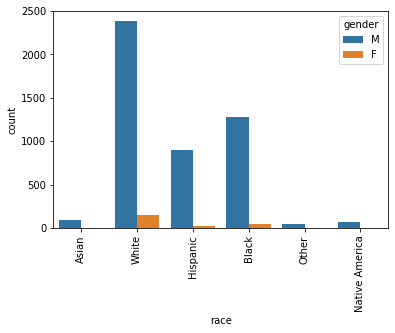

In [5]:
sns.countplot(x='race', data=kill, hue='gender') #vediamo anche se sono stati uccisi più uomini o più donne in base alla razza di appartenenza
plt.xticks(rotation=90) #ruoto i nomi dell'asse X

Possiamo vedere che la maggior parte delle vittime sono di sesso maschile. Perché?

Non è un problema che la polizia ha contro il genere definito "più forte" bensì, secondo delle mie ricerche e questo link https://www.bjs.gov/index.cfm?ty=tp&tid=955 , il sesso maschile è quello più propenso a commettere reati più gravi e più violenti, rispetto alle donne che commettono reati meno gravi, rischiando di meno la loro vita.

Quindi secondo questo dato e questa ricerca possiamo escludere un abuso di potere in base al sesso.

Voglio ora verificare se il numero di vittime è diminuito o aumentato rispetto al 2015 fino al 2019

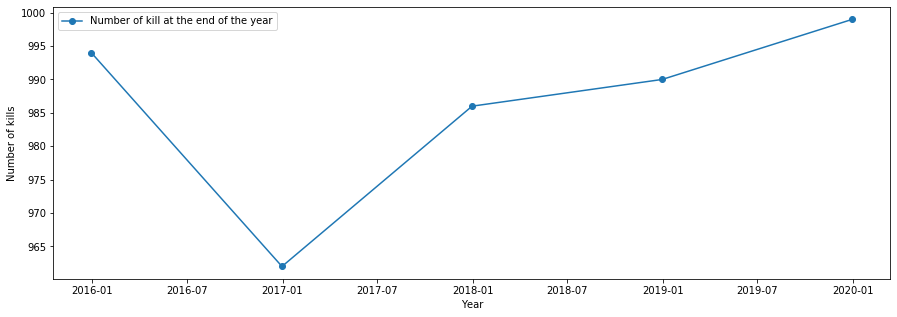

In [6]:
df_kill = kill.groupby('date')['state'].count() #per avere il numero di vittime conto il numero dello stato in base alla data
kill_year = df_kill.resample('Y').sum() #per sapere il numero di vittime annuali sommo i numeri ottenuti
plt.figure(figsize=(15,5))
plt.plot(kill_year[:'2019'], marker='o',label='Number of kill at the end of the year')
plt.ylabel('Number of kills')
plt.xlabel('Year')
plt.legend()
plt.show()

Il numero di vittime è rimasto più o meno costante da quando è stato aperto il dataset fino alla data considerata. Questo mi porta a pensare che il tasso di criminalità in America, in questi anni non è sceso, ma è rimasto sempre lo stesso e che quindi non ci sia un problema di razzismo così evidente nelle forze dell'ordine, soprattutto nei confronti della razza nera.

Di quale arma erano in possesso le vittime?

Text(0.5, 1.0, 'Armi')

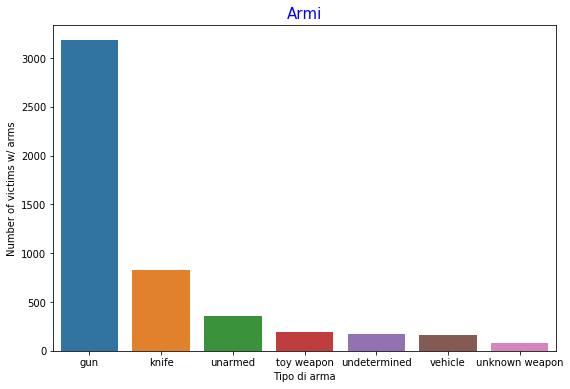

In [7]:
armed = kill.armed.value_counts()

plt.figure(figsize=(9,6))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of victims w/ arms')
plt.xlabel('Tipo di arma')
plt.title('Armi',color = 'blue',fontsize=15)

Perché la polizia ha sparato? La vittima era armata?

Text(0, 0.5, 'number of victim')

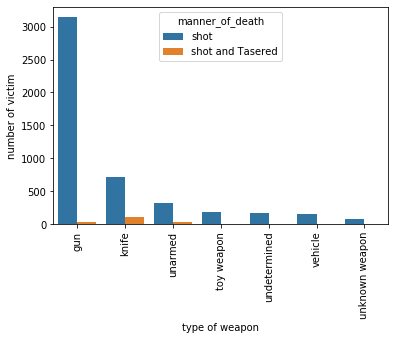

In [8]:
sns.countplot(x='armed', data=kill, hue='manner_of_death', order = kill['armed'].value_counts().index[:7])
plt.xticks(rotation=90) #ruoto i nomi dell'asse X
plt.xlabel('type of weapon')
plt.ylabel('number of victim')

Il grafico ci mostra perché la polizia ha sparato e usato il teaser. 
Il teaser è stato usato relativamente poco rispetto alla pistola, anche quando la vittima non era in possesso di un'arma pericola o arma da distanza. Questo comportamento può significare, a seconda dei casi, che la polizia in quel momento era davvero prevenuta sulla vittima, per questo non ha esitato a spararla e a ucciderla!

Qual'era l'età media delle vittime in base allo stato?

Text(0.5, 1.0, 'Average age for each state')

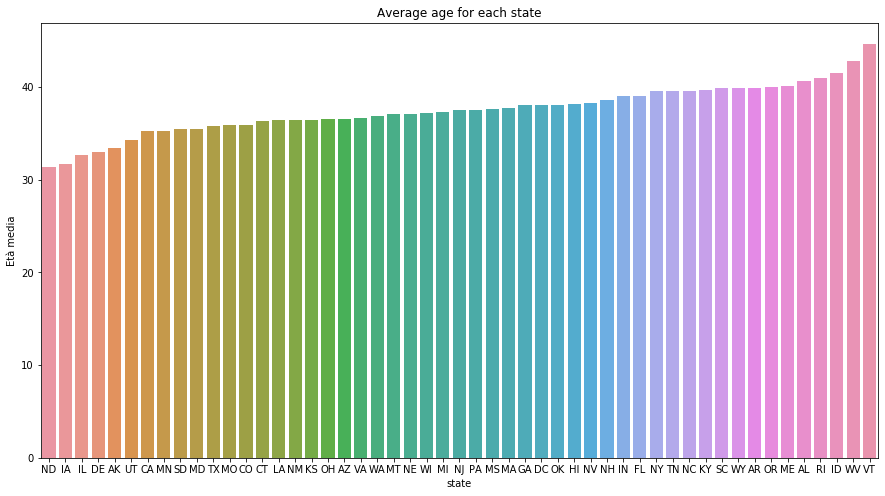

In [9]:
plt.figure(figsize=(15,8))
agevictim = kill.groupby('state')['age'].mean()#faccio la media dell'età raggruppata per stato
sns.barplot(x=agevictim.index,y=agevictim.values, order=agevictim.sort_values().index)
plt.ylabel('Età media')
plt.title('Average age for each state')

L'età media mostra può mostrare un altro bias della polizia. La maggior parte delle vittime hanno più o meno 35 anni. 

Può essere che la polizia sia effettivamente prevenuta e ci siano dei bias anche in base all'età della vittima. Verifichiamolo nel grafico seguente comparando l'età a segni di insanità mentale e al livello di minaccia.

Text(0.5, 1.0, 'Mental state and attack on the police')

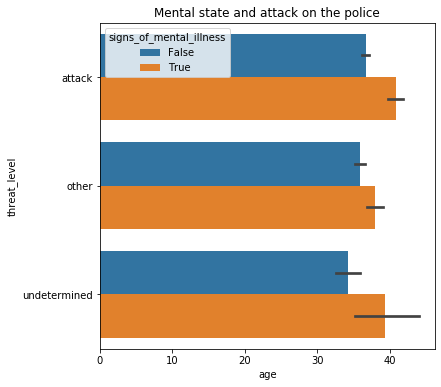

In [10]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'age', y= 'threat_level',data= kill, hue='signs_of_mental_illness')
plt.title('Mental state and attack on the police')

A quanto pare c'è effettivamente un bias!

La polizia parte prevenuta su tutti i casi di criminalità. Questo lo possiamo verificare in quanto la maggior parte delle persone che commette un reato è malata mentalmente, e per questo vengono coinvolti nel bias anche criminali che non lo sono ma con il quale si poteva "ragionare" prima di arrivare a una morte.

Il razzismo gioca qui anche un ruolo fondamentale, perché come possiamo vedere dal livello di minaccia, non ci sono stati tanti casi di attacco diretto. Può essere anche che per la più piccola offesa connessa con il razzismo da parte delle forze dell'ordine, abbia fatto partire il colpo di pistola.

Per concludere e verificare se la polizia ha attaccato in segno di razzismo o meno, andiamo a vedere se quando le vittime hanno attaccato, la polizia aveva una camera attaccata al proprio corpo.

- Un'ipotesi potrebbe essere che magari la polizia che non aveva la camera addosso, abbia volutamente ucciso la vittima e si sia giustificata dal fatto che la stava attaccando.

Text(0.5, 1.0, 'Number of deaths with the body camera')

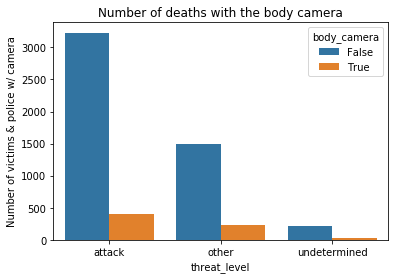

In [11]:
sns.countplot(x='threat_level', data=kill, hue='body_camera')
plt.ylabel('Number of victims & police w/ camera')
plt.title ('Number of deaths with the body camera')

La maggior parte delle vittime è stata uccisa senza che neanche i superiori dell'agente in servizio potessero confermare la vera versione dell'accaduto.
Questo grafico può confermare un problema di razzismo da parte delle forze dell'ordine. L'agente in servizio è più predisposto a esporre la sua forma di razzismo quando non indossa la telecamera, questo gli permette di non essere accusato di abuso di potere e soprattutto di omicidio aggravato.

## Ulteriori bias di povertà e livello scolastico?

Adesso andiamo ad analizzare altri due dataset, quello tra il tasso di povertà e il livello scolastico delle persone per vedere se ci sono dei bias.

In [16]:
#importo i dataset relativi al livello di persone superiori ai 25 anni che hanno completato la scuola, il tasso di povertà e la stima delle popolazioni
school= pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding= 'unicode_escape')
poverty = pd.read_csv('datasets_2647_4395_PercentagePeopleBelowPovertyLevel.csv', encoding= 'unicode_escape')
tot_people = pd.read_csv('sub-est2019_all.csv', encoding= 'unicode_escape')
tot_people.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


Prendiamo in considerazione il numero di abitanti delle città degli States così da poter fare una media più corretta di ogni stato.

In [45]:
peoplepercity = tot_people[['NAME','POPESTIMATE2019' ]] #estrapolo solo le colonne che mi servono e creo un nuovo dataset
peoplepercity2=peoplepercity.rename(columns={'NAME':'City', 'POPESTIMATE2019': 'People_city'}) #rinomino le colonne
peoplepercity2.head()

,City,People_city
0,Alabama,4903185
1,Abbeville city,2560
2,Adamsville city,4281
3,Addison town,718
4,Akron town,328


In [44]:
poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [46]:
school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [74]:
hs_pr = pd.merge(school, poverty) #con la funzione pd.merge unisco i due dataframe
#nel caso ci fossero sostituisco i valori null con 0.0
hs_pr.replace(['-'],0.0,inplace = True)
hs_pr.replace(['(X)'],0.0,inplace = True)
hs_pr[['percent_completed_hs','poverty_rate']] = hs_pr[['percent_completed_hs','poverty_rate']].astype(float) #converto le colonne nominate in float
corr = pd.merge(hs_pr, peoplepercity2)#correlo i dataset di povertà e scuola a quello che è il dato della popolazione

# elimino tutti i risultati duplicati
corr_drop=corr.drop_duplicates(subset =['City']) #elimino tutti i duplicati creati con l'unione del dataset e li "filtro" per città
corr_drop2= corr_drop.set_index('Geographic Area')
corr_drop2.head()

,City,percent_completed_hs,poverty_rate,People_city
Geographic Area,,,,
AL,Abbeville city,69.1,29.1,2560
AL,Adamsville city,78.9,25.5,4281
AL,Addison town,81.4,30.7,718
AL,Akron town,68.6,42.0,328
AL,Alabaster city,89.3,11.2,33487


Con le funzioni eseguite fino a questo punto abbiamo ottenuto la media pesata del tasso di povertà e delle persone (in pecentuale) sopra i 25 anni che hanno terminato gli studi. Vedere la tabella qui sotto.

In [294]:
#calcolo la media ponderata delle due colonne così da ottenere un dataset con la media dei tassi in base allo stato
poverty_average = corr_drop2.groupby('Geographic Area').apply(lambda x: np.average(x.poverty_rate, weights= x.People_city))
school_average = corr_drop2.groupby('Geographic Area').apply(lambda x: np.average(x.percent_completed_hs, weights= x.People_city))
average = pd.DataFrame({'poverty_average': poverty_average, 'school_average': school_average })
average.reset_index(inplace=True)
average.head()

,Geographic Area,poverty_average,school_average
0,AK,10.602152,91.343038
1,AL,20.375017,85.974284
2,AR,21.228913,85.172651
3,AZ,18.380220,85.737087
4,CA,16.315685,81.218243


In [221]:
#per fare una giusta correlazione estrapolo il numero delle vittime per stato dal dataset principale
killperstate= pd.DataFrame(kill.state.value_counts())
killperstate.reset_index(inplace=True)
killperstate.columns=['Geographic Area','Tot_kills']


killperstate.head()

,Geographic Area,Tot_kills
0,CA,832
1,TX,499
2,FL,372
3,AZ,260
4,CO,205


In [244]:
average_kills = pd.merge(average, killperstate) #unisco il dataset creato antecedentemente a quello delle vittime
average_kills.set_index('Geographic Area', inplace=True)
average_kills.head()

,poverty_average,school_average,Tot_kills
Geographic Area,,,
AK,10.602152,91.343038,40
AL,20.375017,85.974284,104
AR,21.228913,85.172651,84
AZ,18.380220,85.737087,260
CA,16.315685,81.218243,832


Dopo aver preso in considerazione anche il numero di vittime per stato, incominciamo a vedere se c'è un bias di povertà. La polizia è più crudele negli stati più poveri? C'è una correlazione?

Text(0.5, 49.99999999999995, 'Number of kills')

<Figure size 1080x1080 with 0 Axes>

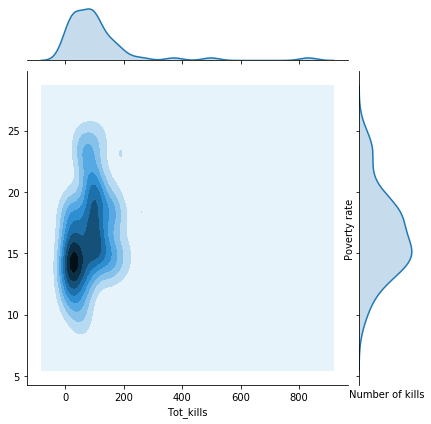

In [322]:
plt.figure(figsize=(15,15))

sns.jointplot(x= average_kills.Tot_kills,y=poverty_average,  data=average_kills, kind="kde")
plt.ylabel('Poverty rate')
plt.xlabel('Number of kills')

C'è quindi un bias di povertà confrontando il numero di vittime al tasso di povertà? 

NO!
Il bias di povertà non c'è. Se ci fosse un bias di povertà nel grafico vedremmo il livello più scuro più in alto e più a destra. Per questo non significa che se la polizia vede un uomo o donna di qualunque razza in 'brutte condizioni', sia (nella maggior parte dei casi) più che pronta a sparare.

Confrontiamo il numero di vittime anche con il tasso di diplomati sopra i 25 anni. Un minor numero di persone diplomate è più soggetto a essere ucciso dalla polizia?

Text(0.5, 49.99999999999995, 'Number of kills')

<Figure size 1080x1080 with 0 Axes>

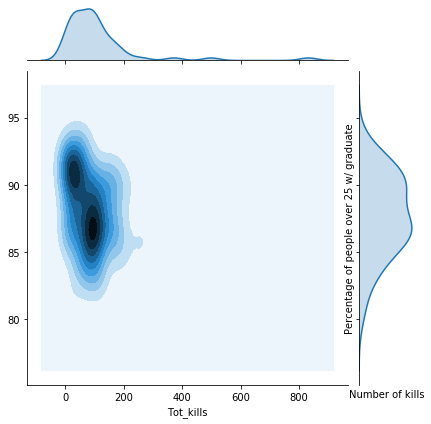

In [325]:
plt.figure(figsize=(15,15))

sns.jointplot(x= average_kills.Tot_kills,y=school_average,  data=average_kills, kind="kde")
plt.ylabel('Percentage of people over 25 w/ graduate')
plt.xlabel('Number of kills')

Qui abbiamo un secondo grafico, simile a quello precedente ma che ci mostra non il tasso di povertà ma il tasso di persone sopra i 25 anni che hanno completato la scuola e preso il diploma. 

Il tasso è davvero alto e abbiamo due punti scuri che vengono manifestati dalla correlazione. I due punti sono concordanti, ovvero maggiore è il numero di persone che hanno finito gli studi e minore sono le vittime, come si può osservane nel punto più in alto. Mentre come possiamo vedere dal punto più basso, minore è il numero di persone che hanno finito gli studi e maggiore sono le vittime, possiamo accorgecene anche dal livello dell'estensione di questo secondo punto scuro.

## Conclusione

Che conclusione si può trarre da questa analisi?

Secondo il mio punto di vista in base a quello che ho analizzato, il razzismo è presente nelle forze dell'ordine anche a causa dei bias che ci sono e si manifestano. Possiamo prendere casi come nell'esempio della body camera e delle persone non armate, ma uccise lo stesso anche quando con il soggetto che ha causato il "crimine" ci si poteva ragionare.

Ovviamente non si può fare di tutta l'erba un fascio e per questo non potremmo condannare tutta la police degli States.